## Read data and check data quality

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from src.paths import RAW_DATA_DIR

In [3]:
# Read data
data = pd.read_csv(RAW_DATA_DIR / 'data_pricing_challenge.csv')

In [4]:
# Check a sample of the data
data.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2/1/2012,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,1/1/2018
1,BMW,M4,13929,317,4/1/2016,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2/1/2018
2,BMW,320,183297,120,4/1/2012,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2/1/2018
3,BMW,420,128035,135,7/1/2014,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2/1/2018
4,BMW,425,97097,160,12/1/2014,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,4/1/2018


In [5]:
# Get data shape
data.shape

(4843, 18)

In [6]:
# Check data types
data.dtypes 

maker_key            object
model_key            object
mileage               int64
engine_power          int64
registration_date    object
fuel                 object
paint_color          object
car_type             object
feature_1              bool
feature_2              bool
feature_3              bool
feature_4              bool
feature_5              bool
feature_6              bool
feature_7              bool
feature_8              bool
price                 int64
sold_at              object
dtype: object

In [7]:
# Check number of nulls in columns.
data.isnull().sum()

maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

There are no null values in the data.

In [8]:
# Check inf values in the data
data[data.isin([np.inf, -np.inf])].sum()

maker_key              0
model_key              0
mileage              0.0
engine_power         0.0
registration_date      0
fuel                   0
paint_color            0
car_type               0
feature_1              0
feature_2              0
feature_3              0
feature_4              0
feature_5              0
feature_6              0
feature_7              0
feature_8              0
price                0.0
sold_at                0
dtype: object

There are no infinite values in the data.

In [9]:
# Find duplicated rows
data[data.duplicated()]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at


There are no duplicates.

In [10]:
# Count unique values in each column
data.nunique()

maker_key               1
model_key              75
mileage              4786
engine_power           61
registration_date     199
fuel                    4
paint_color            10
car_type                8
feature_1               2
feature_2               2
feature_3               2
feature_4               2
feature_5               2
feature_6               2
feature_7               2
feature_8               2
price                 437
sold_at                 9
dtype: int64

From the number of unique feature values we can observe that:
- There is only one maker (BWM). So, this feature will not give information to the models.
- There are 199 different registration dates.
- feature_1 to feature_8 are binary variables.
- The auction happened in 9 different dates.

In [11]:
# Convert date columns to datetime
data['registration_date'] = pd.to_datetime(data['registration_date'])
data['sold_at'] = pd.to_datetime(data['sold_at'])

In [12]:
# Check range of registration dates
data['registration_date'].min(), data['registration_date'].max()

(Timestamp('1990-03-01 00:00:00'), Timestamp('2017-11-01 00:00:00'))

In [13]:
# Check range of solt_at dates
data['sold_at'].min(), data['sold_at'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-09-01 00:00:00'))

Based on the date ranges, the oldest car is at least 27 years old, and the newest less than 1 year old. This suggests that the age of the car will be a variable worth considering.

In [14]:
# Check unique month days in registration_date
print(data['registration_date'].dt.day.nunique())

1


In [15]:
# Check unique month days in sold_at
print(data['sold_at'].dt.day.nunique())

1


Since the only day of the month in all of the dates is day 1, the smallest granularity for days is monthly.

Based on dates granularity and the observation that car ages range from less than a year to at least 27 years old, the "age_in_months_when_sold" variable will be calculated.

In [16]:
data['age_in_months_when_sold'] = (data['sold_at'].dt.to_period('M') - data['registration_date'].dt.to_period('M')).apply(lambda x: x.n)

In [17]:
data[['registration_date', 'sold_at', 'age_in_months_when_sold']].head()

,registration_date,sold_at,age_in_months_when_sold
0,2012-02-01,2018-01-01,71
1,2016-04-01,2018-02-01,22
2,2012-04-01,2018-02-01,70
3,2014-07-01,2018-02-01,43
4,2014-12-01,2018-04-01,40


In [18]:
# Save data with age_in_months_when_sold column
data.to_csv(RAW_DATA_DIR / 'data_pricing_challenge_with_age.csv', index=False)

In [19]:
# Describe the numeric columns in the data
data.describe()

,mileage,engine_power,registration_date,price,sold_at,age_in_months_when_sold
count,4.843000e+03,4843.00000,4843,4843.000000,4843,4843.000000
mean,1.409628e+05,128.98823,2012-11-22 14:51:42.704934912,15828.081767,2018-04-29 08:15:03.902539520,65.186042
min,-6.400000e+01,0.00000,1990-03-01 00:00:00,100.000000,2018-01-01 00:00:00,7.000000
25%,1.029135e+05,100.00000,2012-07-01 00:00:00,10800.000000,2018-03-01 00:00:00,49.000000
50%,1.410800e+05,120.00000,2013-07-01 00:00:00,14200.000000,2018-05-01 00:00:00,58.000000
75%,1.751955e+05,135.00000,2014-04-01 00:00:00,18600.000000,2018-07-01 00:00:00,70.000000
max,1.000376e+06,423.00000,2017-11-01 00:00:00,178500.000000,2018-09-01 00:00:00,337.000000
std,6.019674e+04,38.99336,NaN,9220.285684,NaN,30.466419


Looking at the description of numerical features, hints that there are possibly erroneous observations. For example:
- a car with -64 miles,
- a car with 0 (I assume hp) engine power, 
- and a car that costed 100 (I assume USD)

Therefore, data needs some further cleaning.

## Find odd observations and remove incorrect observations

### Check mileage

In [20]:
data[data['mileage'] < 0]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,age_in_months_when_sold
2938,BMW,640 Gran Coupé,-64,230,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000,2018-04-01,13


In [21]:
len(data[data['model_key'] == '640 Gran Coupé'])

19

There is a 640 Gran Coupé with negative mileage which is not possible. Also, there are other 18 cars of the same model key, so this row will be removed.

In [22]:
data[data['mileage'] > 1e6]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,age_in_months_when_sold
3732,BMW,118,1000376,90,2005-03-01,diesel,black,subcompact,True,False,False,False,False,False,True,False,1400,2018-06-01,159


This is a 13 year-old car (159 months). Although strange, it is not impossible that it has driven this many miles (about 210 in average daily). So this observation is not recommended to be removed.

In [23]:
# Remove row with index 2938 (negative mileage)
data = data.drop(index=2938)

In [24]:
data[data['mileage'] < 0]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,age_in_months_when_sold


### Check engine power

In [25]:
data[data['engine_power'] < 70]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,age_in_months_when_sold
1796,BMW,i3,152328,25,2014-02-01,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,20300,2018-04-01,50
1925,BMW,i3,152470,25,2014-02-01,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,15500,2018-03-01,49
2390,BMW,318,170529,66,2000-05-01,diesel,silver,hatchback,False,False,True,False,False,False,False,False,1000,2018-08-01,219
2771,BMW,316,146951,66,1990-03-01,petrol,white,sedan,False,False,False,False,False,False,False,False,1300,2018-04-01,337
3765,BMW,X1,81770,0,2014-10-01,diesel,white,suv,False,False,False,False,False,False,False,False,11700,2018-03-01,41


Check how many other cars are there with the same model key.

In [26]:
len(data[data['model_key'] == 'X1'])

275

In [27]:
len(data[data['model_key'] == 'i3'])

6

In [28]:
len(data[data['model_key'] == '318'])

569

In [29]:
len(data[data['model_key'] == '316'])

235

Describe engine power column for i3, 318, and 316 without suspicious observations.

In [30]:
data[data['model_key'] == 'i3'].drop(index=[1796, 1925])['engine_power'].describe()

count      4.0
mean      87.5
std       25.0
min       75.0
25%       75.0
50%       75.0
75%       87.5
max      125.0
Name: engine_power, dtype: float64

In [31]:
data[data['model_key'] == '316'].drop(index=[2771])['engine_power'].describe()

count    234.000000
mean      84.952991
std        1.511732
min       75.000000
25%       85.000000
50%       85.000000
75%       85.000000
max      100.000000
Name: engine_power, dtype: float64

In [32]:
data[data['model_key'] == '318'].drop(index=[2390])['engine_power'].describe()

count    568.000000
mean     101.276408
std        4.240063
min       85.000000
25%      100.000000
50%      100.000000
75%      105.000000
max      110.000000
Name: engine_power, dtype: float64

There is a wrong observation with 0 engine power for an X1 which is a SUV. This is impossible. Since there are more than 200 other X1 this observation can be removed.

Very likely the engine power of 25 (hp) for two i3 is wrong. These cars should have 75 (hp) engine power, so this is probably a typo. Since there are very few other i3 cars, data imputation might be a better alternative here to dropping the records. According to most values, a good candidate value for imputation is 75.

Regarding models 316 and 318, since there are more than 200 hundred other observations with the same model, and these cars typically have at least 75 of engine power, these records can also be deleted.

In [33]:
# Remove 0 power observation
data = data.drop(index=[3765])

In [34]:
data[data['engine_power'] <= 0]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,age_in_months_when_sold


In [35]:
# Replace engine power value for i3 model
data.loc[1796, 'engine_power'] = 75
data.loc[1925, 'engine_power'] = 75

In [36]:
data[data['model_key'] == 'i3']

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,age_in_months_when_sold
1796,BMW,i3,152328,75,2014-02-01,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,20300,2018-04-01,50
1895,BMW,i3,26542,75,2014-03-01,electro,grey,hatchback,False,True,False,False,False,False,True,True,20900,2018-02-01,47
1925,BMW,i3,152470,75,2014-02-01,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,15500,2018-03-01,49
2317,BMW,i3,78740,75,2014-04-01,electro,grey,hatchback,True,True,False,False,False,False,True,False,20800,2018-07-01,51
2363,BMW,i3,46359,125,2014-01-01,electro,white,hatchback,True,True,False,False,False,False,True,True,21200,2018-08-01,55
3690,BMW,i3,6572,75,2015-11-01,hybrid_petrol,black,subcompact,True,True,True,False,False,False,True,True,28000,2018-03-01,28


In [37]:
# Remove low power 316 and 318 observations
data = data.drop(index=[2390, 2771])

In [38]:
data[data['engine_power'] <= 66]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,age_in_months_when_sold


In [39]:
data.shape

(4839, 19)

## Check price

Are there cars that sold at unusually low prices?

In [40]:
unusually_cheap_cars = data[(data['price'] < 1000)]

In [41]:
unusually_cheap_cars.describe()

,mileage,engine_power,registration_date,price,sold_at,age_in_months_when_sold
count,62.000000,62.000000,62,62.000000,62,62.000000
mean,194706.870968,110.451613,2008-05-04 23:36:46.451612928,646.774194,2018-04-09 12:23:13.548387072,119.161290
min,79685.000000,75.000000,1994-01-01 00:00:00,100.000000,2018-01-01 00:00:00,34.000000
25%,131414.000000,90.250000,2000-03-01 00:00:00,500.000000,2018-03-01 00:00:00,45.000000
50%,165244.500000,105.000000,2013-05-01 00:00:00,800.000000,2018-04-01 00:00:00,58.500000
75%,230499.500000,131.250000,2014-06-01 00:00:00,800.000000,2018-06-01 00:00:00,217.500000
max,439060.000000,190.000000,2015-05-01 00:00:00,900.000000,2018-09-01 00:00:00,291.000000
std,87350.448051,25.376947,NaN,260.967771,NaN,90.298811


There were 62 cars sold at less than 1,000 which is very unusual. Looking at a description of the numerical features of these cars we find:
- The newest car sold at this price was less than 3 years old. This seems unusual.
- The oldest car was 24 years old.
- Minimum and max mileage seem sensible.

Although these prices are unusual, maybe some of them are more common suggesting it's not necessarily a mistake.

In [42]:
# Print value counts for price in the unusually cheap cars
unusually_cheap_cars['price'].value_counts()

price
800    36
100     7
400     5
900     4
700     4
200     3
500     2
600     1
Name: count, dtype: int64

Based on the above value counts, we can conclude that prices 800 and above are not necessarily unusual. So, these will be kept.

Prices below 800 seem more unusual and might correspond to cars with important damages. Since cars with engine damages were removed before, these other cars with important damages could be removed as well and maybe priced with another strategy.

In [43]:
# Print value counts for model_key in unusually cheap cars
unusually_cheap_cars['model_key'].value_counts().sort_index()

model_key
116     1
118     1
218     2
316     8
318    10
320    17
330     1
520     4
523     2
525     8
X1      5
X3      3
Name: count, dtype: int64

In [44]:
# Print value counts for model_key in the whole data restricted to the model_keys in the unusually cheap cars
data[data['model_key'].isin(unusually_cheap_cars['model_key'])]['model_key'].value_counts().sort_index()

model_key
116    358
118    143
218     13
316    234
318    568
320    752
330     33
520    633
523      4
525    184
X1     274
X3     438
Name: count, dtype: int64

In [45]:
# Print the mean price for each model_key in the unusually cheap cars
unusually_cheap_cars.groupby('model_key')['price'].mean().sort_index()

model_key
116    100.000000
118    800.000000
218    800.000000
316    687.500000
318    610.000000
320    682.352941
330    800.000000
520    625.000000
523    800.000000
525    500.000000
X1     760.000000
X3     566.666667
Name: price, dtype: float64

In [46]:
# Print the mean price for each model_key in the whole data restricted to the model_keys in the unusually cheap cars
data[data['model_key'].isin(unusually_cheap_cars['model_key'])].groupby('model_key')['price'].mean().sort_index()

model_key
116     9653.910615
118     9647.552448
218    17715.384615
316    10420.512821
318    11004.753521
320    12161.702128
330    16672.727273
520    15709.162717
523     6875.000000
525    15363.043478
X1     12703.649635
X3     18175.799087
Name: price, dtype: float64

Not removing cars with prices starting at 800 also prevents removing models with very low car count like 218 and 523 from the data set.

In [47]:
len(data[data['price'] < 800])

22

In [48]:
# Remove observations with price < 800
data = data[data['price'] >= 800]

In [49]:
data.shape

(4817, 19)

In [50]:
data[data['price'] < 800]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,age_in_months_when_sold


## Visually explore the data

In [51]:
from src.plots import plot_avg_target_time_series_by_features, plot_distribution_of_features, plot_distribution_of_target_by_feature

In [52]:
# Get a list of columns in the data
data_columns = data.columns

In [53]:
car_features = [col for col in data_columns if 'feature' in col]

In [54]:
import joblib

# Save car_features list
joblib.dump(car_features, RAW_DATA_DIR / 'car_features.pkl')

['C:\\Users\\ciroalfonsom\\learning\\cars-price\\data\\raw\\car_features.pkl']

### Check price evolution by categorical feature values

#### Check price in time by car features

In [55]:
plot_avg_target_time_series_by_features(data, car_features)

The following observations can be made from the plots above:
- Except for feature_7, cars with True in the other car features have in average higher prices than cars without them. This suggests that these features will be important for predictive models.
- There seems to be a peak average price in Aug 2018. This may be caused by a sale of a highly price car precisely this month.

<Axes: xlabel='sold_at'>

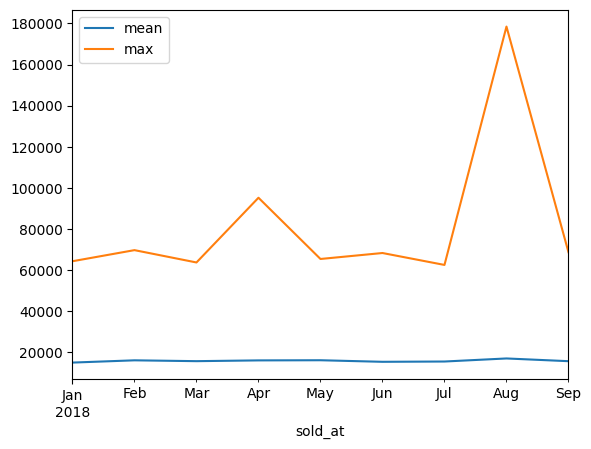

In [56]:
# Check average and max price by sold_at date
data.groupby('sold_at')['price'].agg(['mean', 'max']).plot()

In [57]:
# Check maximum price in the data
data['price'].max()

178500

In [58]:
# Get record with maximum price
data[data['price'] == data['price'].max()]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,age_in_months_when_sold
4753,BMW,X3,72515,135,2013-03-01,diesel,blue,suv,False,False,True,False,False,False,False,True,178500,2018-08-01,65


As suspected, the car with the maximum price (a 5-year-old X3) was sold in Aug 2018, bringing the average up. This does not necessarily mean that this month was the month with the highest prices in general.

In [59]:
data_without_max_prices = data.drop(index=4753)

<Axes: xlabel='sold_at'>

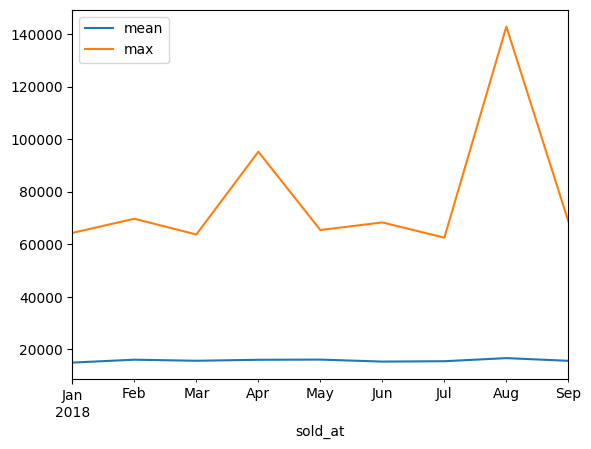

In [60]:
data_without_max_prices.groupby('sold_at')['price'].agg(['mean', 'max']).plot()

In [61]:
data_without_max_prices[data_without_max_prices['price'] == data_without_max_prices['price'].max()]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,age_in_months_when_sold
4684,BMW,X4,103222,140,2014-08-01,diesel,grey,suv,True,True,False,False,True,False,True,True,142800,2018-08-01,48


The second most expensive car (a 4-year-old X4) was also sold in Aug 2018. So maybe August was a good month in general.

In [62]:
data_without_max_prices = data_without_max_prices.drop(index=4684)

<Axes: xlabel='sold_at'>

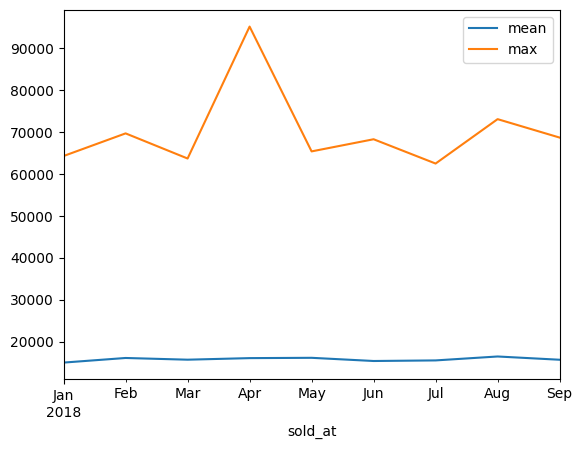

In [63]:
data_without_max_prices.groupby('sold_at')['price'].agg(['mean', 'max']).plot()

In [64]:
data_without_max_prices[data_without_max_prices['price'] == data_without_max_prices['price'].max()]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,age_in_months_when_sold
90,BMW,i8,12402,170,2016-01-01,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200,2018-04-01,27


The third most expensive car (a 2-year-old i8) was sold in April.

In [65]:
data_without_max_prices = data_without_max_prices.drop(index=90)

<Axes: xlabel='sold_at'>

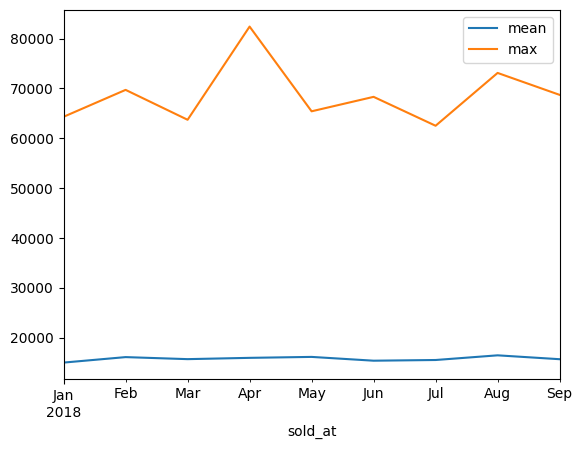

In [66]:
data_without_max_prices.groupby('sold_at')['price'].agg(['mean', 'max']).plot()

In [67]:
# Check average price by car feature in time after removing exptreme prices
plot_avg_target_time_series_by_features(data_without_max_prices, car_features)

After removing large prices, the conclusions for the relation between price and car features values still holds.

Also, for both data with and without the highest prices, average prices tended to increase towasr the end of summer 2018, after dropping at the start of the summer.

#### Check price in time by fuel type, cart_type, and paint color

In [68]:
small_cardinality_features = ['fuel', 'car_type', 'paint_color']

In [69]:
# Save small_cardinality_features list
joblib.dump(small_cardinality_features, RAW_DATA_DIR / 'small_cardinality_features.pkl')

['C:\\Users\\ciroalfonsom\\learning\\cars-price\\data\\raw\\small_cardinality_features.pkl']

In [70]:
plot_avg_target_time_series_by_features(data, small_cardinality_features)

In [71]:
plot_avg_target_time_series_by_features(data_without_max_prices, small_cardinality_features)

The following observations can be made from the plots based on both data with and without the highest prices:
- Hybrid and electrical cars are more expensive on average.
- Electrical cars average prices were stable from winter to summer, and were not sold in autumn.
- Diesel and petrol cars had similar average prices, although petrol cars had a drop in average prices starting summer 2018.
- The most expensive car type is, on average, suv, although coupe was most expensive at the start of the year and then dropped below suv also starting in summer.
- Coupe and convertible cars were, on average, more expensive in winter than in summer.
- Vans where more expensive, on average, in spring, summer, and autumn, than in winter.
- Subcompact had generally the lowest average prices.
- Paint color does not seem to generally determine or be associated with the average price, except for color green, which consistently had prices much lower than other colors. Maybe not very popular.
- Orange and white cars were sold for more, on average, during summer than during winter and spring.
- Red cars were the opposite, with lower average prices during summer than during winter and spring.

### Check numerical features distributions

In [72]:
features_for_distribution_plot = ['mileage', 'engine_power', 'age_in_months_when_sold', 'price']

In [73]:
plot_distribution_of_features(data, features_for_distribution_plot)

The features still have very high values after removing the data that probably had errors. 
Examples are:
- 1M miles drove. This can be rare but possible for old cars. 
- A few cars costed more than 100k, which is also possible depending on the car.
- There are some cars with engine power above 400, which can happen for sports cars.
- There are cars as old as 22 years, which is also possible.

These values do not suggest that further data cleaning is needed.

#### Check distribution by model

In [74]:
plot_distribution_of_target_by_feature(data, 'model_key')

It is expected that model determines price, this can be seen in the above plot which shows a large variety of prices. 

In [75]:
# Count unique model_keys in the data
data['model_key'].nunique()

75

In [76]:
# Count number of observations by model_key
model_counts = data['model_key'].value_counts().sort_values(ascending=False)

In [77]:
# Show model counts with less than 10 observations
model_counts[model_counts < 10].count()

43

From the 75 models in the data, more than half have less than 10 cars, so this variable alone could be not very good for generalizing prices. Maybe a variable based on this one could be useful.

#### Check scatter plots of numerical feature vs. price

In [78]:
from src.plots import plot_scatter_of_target_vs_features

In [79]:
numerical_features = ['mileage', 'engine_power', 'age_in_months_when_sold']

In [80]:
plot_scatter_of_target_vs_features(data, numerical_features)

Based on the scatter plots, the following observations can be made:
- As expected, prices tend to decrease with mileage.
- As expected, prices tend to increase with engine power.
- As expected, prices tend to decrease with age.

## Save cleaned data

In [81]:
from src.paths import CLEANED_DATA_DIR

In [82]:
data.to_csv(CLEANED_DATA_DIR / 'cleaned_data.csv', index=False)